# ✅ 1. Load the Cleaned Data

In [0]:
# Load the cleaned, balanced dataset from Parquet
df = spark.read.parquet("dbfs:/FileStore/tables/creditcard_balanced.parquet/")

# Register it as a temporary SQL view so you can query it
df.createOrReplaceTempView("creditcard_balanced")

# Verify: Run a simple SQL querypdf = df.toPandas()

df_sql = spark.sql("SELECT * FROM creditcard_balanced LIMIT 5")
df_sql.show()


+-------+-------------------+------------------+-----------------+-------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+-----------------+-------------------+------+-----+
|   Time|                 V1|                V2|               V3|                 V4|                V5|                V6|                V7|               V8|                V9|               V10|               V11|               V12|               V13|                V14|               V15|              V16|               V17|               V18|               V19|               V20|               V21|               V22|              

In [0]:
pdf = df.toPandas()

# 📊 2. Class Distribution

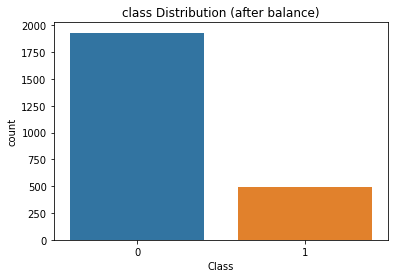

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Class", data=pdf)
plt.title("class Distribution (after balance)")
plt.show()

# 🧮 3. Feature Correlation Matrix

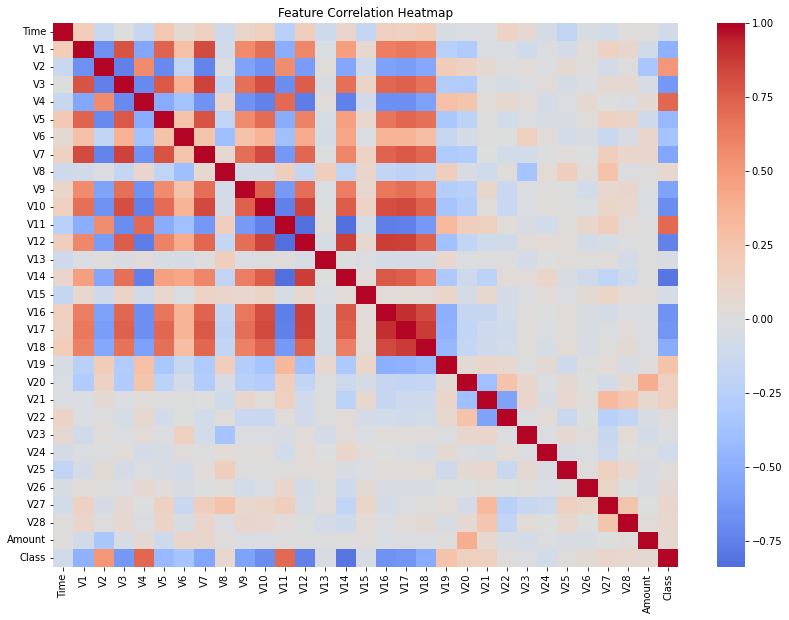

In [0]:
plt.figure(figsize=(14,10))
corr = pdf.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature vs. Feature (default correlation matrix)

What it does: Compares every feature to every other feature.

Purpose: Detect multicollinearity — when two or more features are highly correlated with each other. Example of this in the above heatmap is V16 to V18 seems to be highly correlated.

Why it matters: Highly correlated features may provide redundant information to the model, and some models (like linear regression) perform poorly when multicollinearity exists. 

### Feature vs. Target
What it does: Correlates each feature with the target variable (e.g., class or label).

Purpose: Identify which features are most relevant for predicting the target. An example would be between V4 and Class or V11 and Class.

Why it matters: Helps in feature selection by highlighting which features are strong predictors.

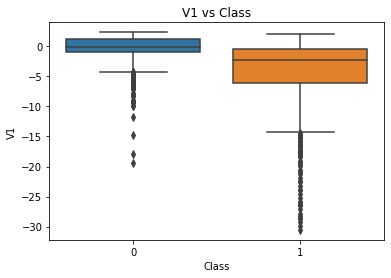

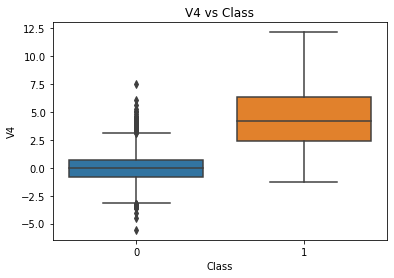

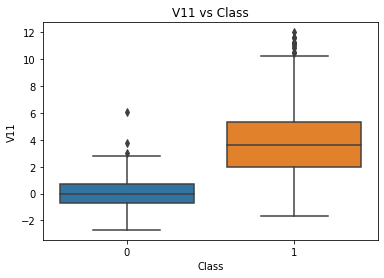

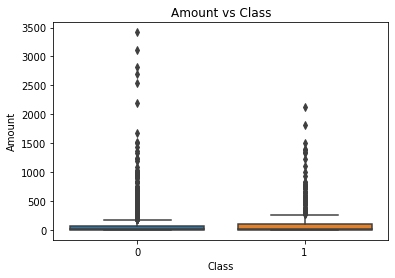

In [0]:
features = ['V1','V4','V11','Amount']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Class",y=feature, data=pdf)
    plt.title(f'{feature} vs Class')
    plt.show()


V1 vs Class sees a large amount of outliers for both Fraudulant and Non-Fraudulant transactions. It also shows that V1 is not highly correlated to Class

V4 vs Class sees a some amount of outliers for Non-Fraudulant vs Class while Fraudulant vs Class transactions has no outliers. It also shows that V4 is correlated to Class.

V11 vs Class sees a small amount of outliers for both Fraudulant and Non-Fraudulant transactions. It also shows that V1 is correlated to Class


# 📈 5. Time-Based Analysis

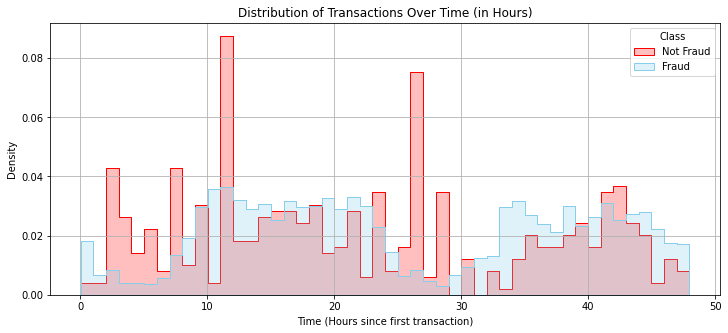

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add a new column for time in hours
pdf['Hour'] = pdf['Time'] / 3600  # Convert seconds to hours

# Plot histogram with hourly bins
plt.figure(figsize=(12, 5))
sns.histplot(data=pdf, x="Hour", hue="Class", bins=48, element="step", stat="density", common_norm=False, palette=["skyblue", "red"])
plt.title("Distribution of Transactions Over Time (in Hours)")
plt.xlabel("Time (Hours since first transaction)")
plt.ylabel("Density")
plt.legend(title="Class", labels=["Not Fraud", "Fraud"])
plt.grid(True)
plt.show()


# 💾 5. Save Cleaned Data

In [0]:
df.write.mode("overwrite").parquet("/FileStore/tables/creditcard_final_eda.parquet")
